In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
from scipy.io import loadmat

mat_data_A = loadmat("/kaggle/input/perceptron-data/Data set A.mat.mat")
mat_data_B = loadmat("/kaggle/input/perceptron-data-b/Data set B.mat.mat")

data_A_X = mat_data_A['X']
data_A_y = mat_data_A['Y']

data_B_X = mat_data_B['X']
data_B_y = mat_data_B['Y']

In [3]:
def _step_function(weighted_sum, threshold): 
    """
    Implements the signum activation function
    for a given weighted sum. An activation function
    aims to introduce non-linearity to a system, enabling
    the system to capture more complex patterns. 
    
    The signum activation function normalizes the output layer
    into one of two values: -1, 1. 
    """
    
    return np.where(weighted_sum >= threshold, 1, -1)
    
# def _weighted_sum(feature_space, weight_vector, bias=0):
#     """
#     Helper function to calculate the matrix-vector 
#     multiplication between the feature space and the 
#     weight vector, plus a bias. 
#     """

#     if len(feature_space.shape) == 1:
#         # Handle 1D input 
#         result = bias
        
#         for i in range(len(feature_space)):
#             result += feature_space[i] * weight_vector[i]
                
#     else:
#         # Handle 2D input
#         num_samples, num_features = feature_space.shape
#         result = [bias] * num_samples
        
#         for i in range(num_samples):
#             for j in range(num_features):
#                 result[i] += feature_space[i][j] * weight_vector[j]
    
#     return np.array(result)


def _weighted_sum(feature_space, weight_vector, bias=0):
    """
    Helper function to calculate the matrix-vector 
    multiplication between the feature space and the 
    weight vector, plus a bias. 
    """

    return np.dot(feature_space, weight_vector) + bias

In [4]:
class Perceptron:    
    def __init__(self, learning_rate=0.3, epochs=100, threshold=0):
        self.learning_rate = learning_rate
        self.epochs = epochs 
        self.threshold = threshold 
        
        self.errors = []
        self.weights = None 
        self.bias = None 

    def predict(self, X):        
        weighted_sum = _weighted_sum(X, self.weights, self.bias)
        activated_sum = _step_function(weighted_sum, self.threshold)

        return activated_sum

    def fit(self, X, y):
        num_samples, num_features = X.shape
        epoch = 0
        converged = False 
        
        self.weights = np.random.uniform(-0.01, 0.01, size=num_features)
        self.bias = 0
        
        while not converged and epoch < self.epochs:   
            epoch += 1 
            error_sum = 0 
            
            for i in range(num_samples):
                x_i, y_i = X[i], y[i]
                y_pred = self.predict(x_i)
                
                error = y_i - y_pred
                error_sum += error[0]**2
                
                if error[0] != 0: 
                    self.weights += self.learning_rate * y_i * x_i
                    self.bias += self.learning_rate * y_i
            
            self.errors.append(error_sum) 
                
            if error_sum == 0: 
                converged = True

# CASE 1 

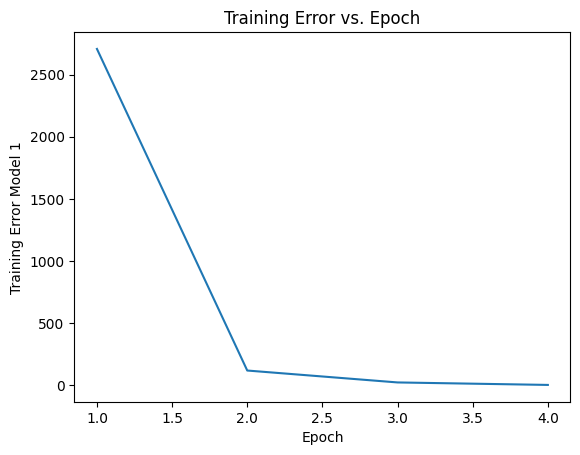

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

model1 = Perceptron(epochs=1000, learning_rate=0.000001)
model1.fit(data_A_X, data_A_y)

plt.plot(range(1, len(model1.errors) + 1), model1.errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error Model 1')
plt.title('Training Error vs. Epoch')
plt.show()

Text(0.5, 1.0, 'Decision Boundary for model1')

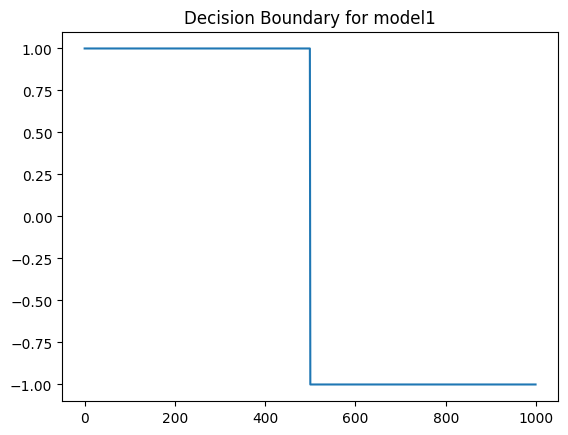

In [6]:
plt.plot(data_A_y)
plt.title('Decision Boundary for model1')

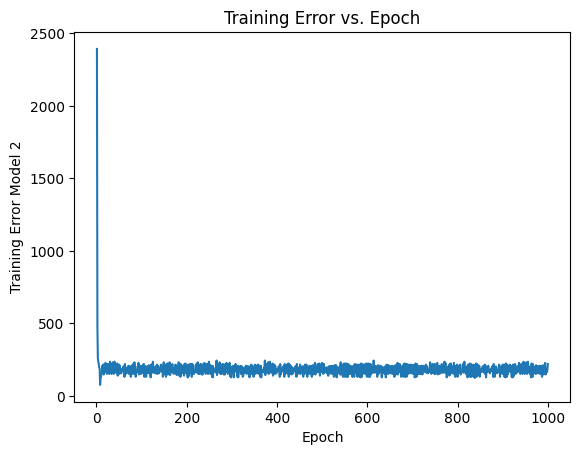

In [7]:
model2 = Perceptron(epochs=1000, learning_rate=0.000001)
model2.fit(data_B_X, data_B_y)


plt.plot(range(1, len(model2.errors) + 1), model2.errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error Model 2')
plt.title('Training Error vs. Epoch')
plt.show()

Text(0.5, 1.0, 'Decision Boundary for model2')

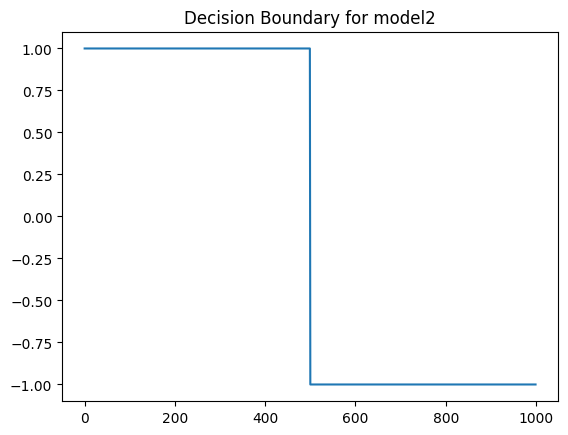

In [8]:
plt.plot(data_B_y)
plt.title('Decision Boundary for model2')

# CASE 2

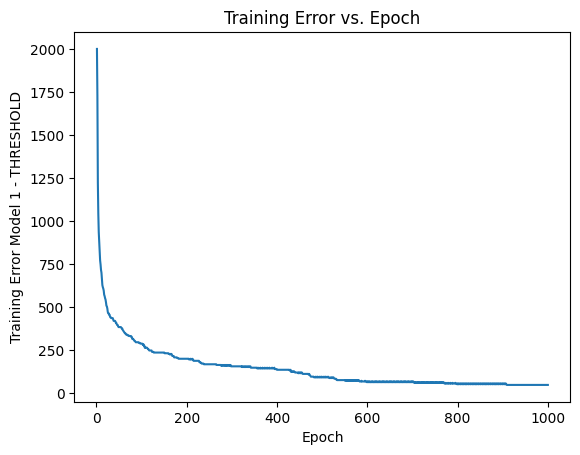

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 

model1_threshold = Perceptron(epochs=1000, learning_rate=0.00001, threshold=0.5)
model1_threshold.fit(data_A_X, data_A_y)

plt.plot(range(1, len(model1_threshold.errors) + 1), model1_threshold.errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error Model 1 - THRESHOLD')
plt.title('Training Error vs. Epoch')
plt.show()

Text(0.5, 1.0, 'Thresholded Decision Boundary for model1')

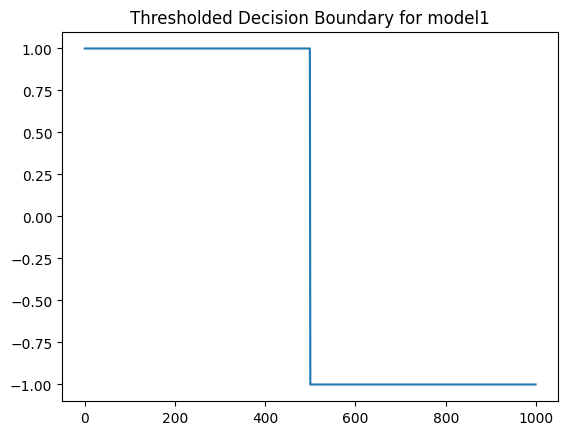

In [10]:
plt.plot(data_A_y)
plt.title('Thresholded Decision Boundary for model1')

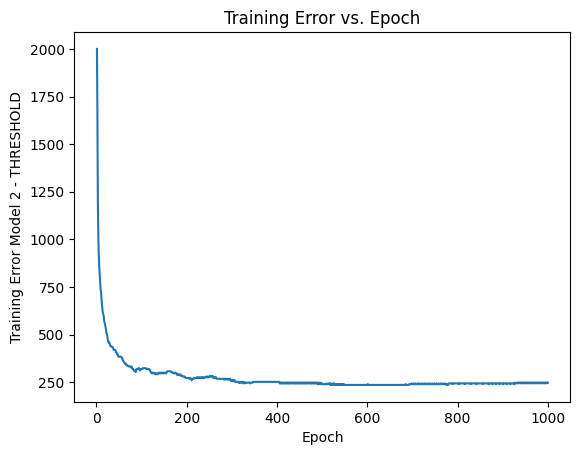

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 

model2_threshold = Perceptron(epochs=1000, learning_rate=0.00001, threshold=0.5)
model2_threshold.fit(data_B_X, data_B_y)

plt.plot(range(1, len(model2_threshold.errors) + 1), model2_threshold.errors)
plt.xlabel('Epoch')
plt.ylabel('Training Error Model 2 - THRESHOLD')
plt.title('Training Error vs. Epoch')
plt.show()

Text(0.5, 1.0, 'Thresholded Decision Boundary for model2')

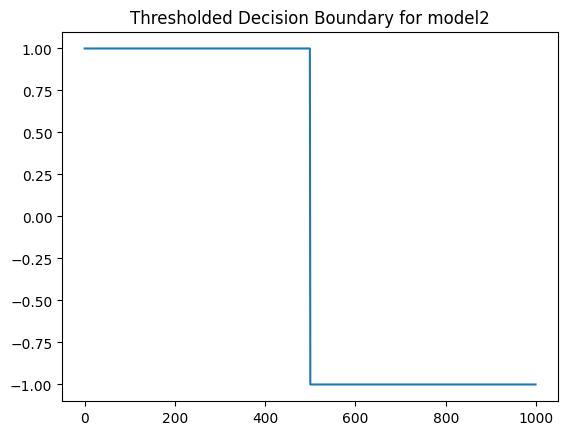

In [12]:
plt.plot(data_B_y)
plt.title('Thresholded Decision Boundary for model2')

# ERROR RATES

In [13]:
print(f'Model 1: {model1.errors[-1]}')
print(f'w/ Theta: {model1_threshold.errors[-1]}')
print(f'Model 2: {model2.errors[-1]}')
print(f'w/ Theta: {model2_threshold.errors[-1]}')

Model 1: 0
w/ Theta: 48
Model 2: 220
w/ Theta: 248
